### Import modules and load the data

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Load the hist_counts_by_label from HDF5
symptom = "Dyskinesia"  # or "Tremor"
week = 1
path_to_folder = rf"path_to_your_base_folder\{symptom}"
filename = f"hist_counts_delta_with_inclusions_week{week}.mat"
fullpath_to_file = os.path.join(path_to_folder, filename)
with h5py.File(fullpath_to_file, 'r') as f:
    symptom_groups = [f'No{symptom}', f'Mild{symptom}', f'Severe{symptom}']
    hist_counts_by_label = {group: f['hist_counts_by_label'][group][:] for group in symptom_groups}
    hist_counts_by_label_unadj = {group: f['hist_counts_by_label_unadj'][group][:] for group in symptom_groups}


final_database = pd.read_csv("Path/to/your/feasibility_database.csv")
final_database['tremor_label'] = final_database['Up3OfRAmpArmYesDev'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if pd.notna(x) and x > 1 else x)))
final_database['dyskinesia_label'] = final_database['UPDRS4_sum_factor1'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if pd.notna(x) and x > 1 else x)))


In [17]:
hist_counts_by_label.keys()

dict_keys(['NoDyskinesia', 'MildDyskinesia', 'SevereDyskinesia'])

#### Now make some plots for tremor

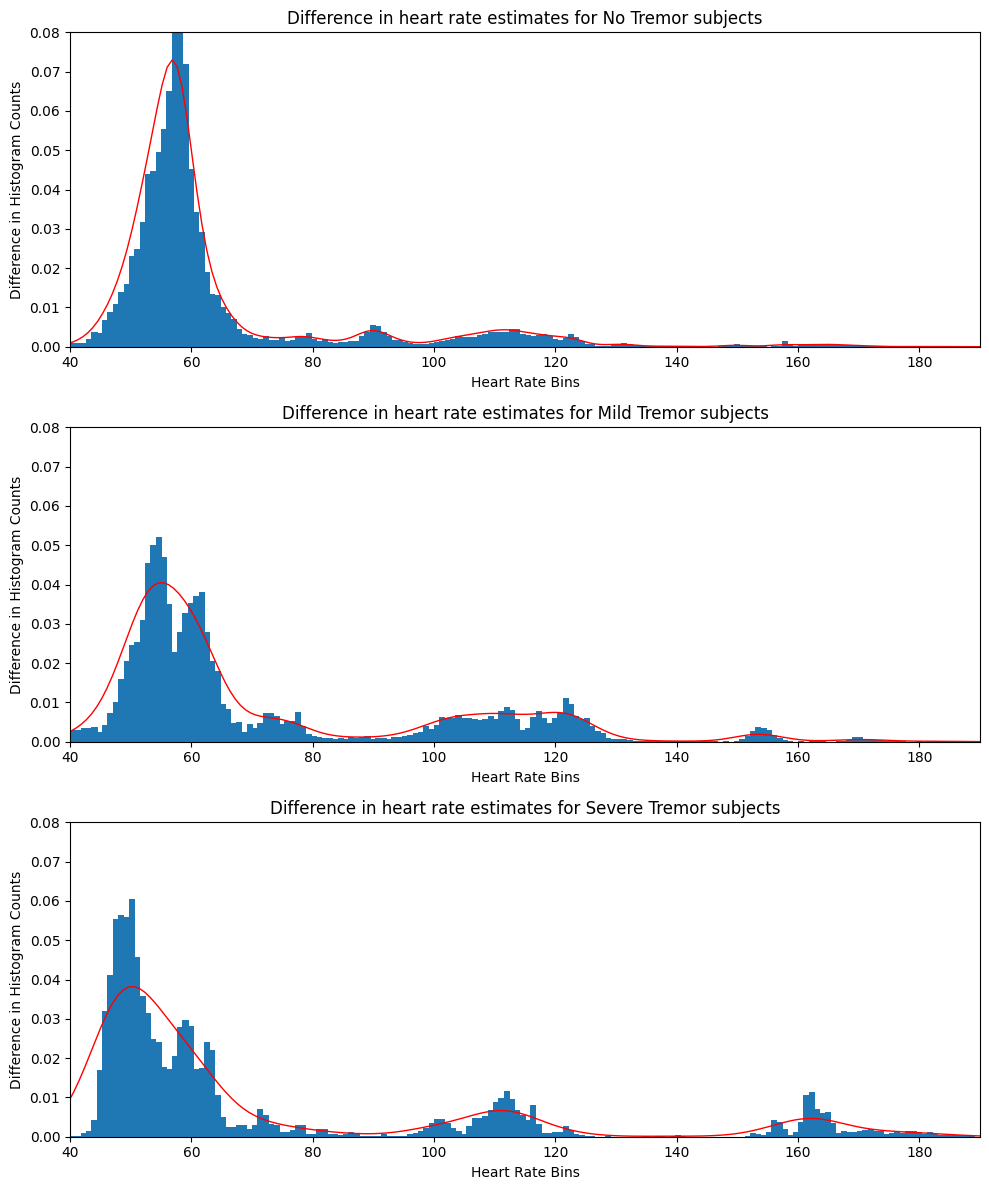

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the differences between adjusted and unadjusted results
tremor_groups = ['NoTremor', 'MildTremor', 'SevereTremor']
diff_hist_counts = {}

# Compute differences for each tremor group
for group in tremor_groups:
    diff_hist_counts[group] = hist_counts_by_label[group] - hist_counts_by_label_unadj[group]

# Initialize list for axes handles
axes_handles_unadj = []
bin_resolution = 0.8824
bin_edges = np.arange(40, 200,bin_resolution)

TremorLabel = final_database['tremor_label'].values
# Visualize the differences using bar plots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, group in enumerate(tremor_groups):
    n_ind = np.sum(TremorLabel == i)  # Assuming `TremorLabel` is defined or loaded

    # Separate day and night for visualization
    day_diffs = diff_hist_counts[group][:, 0]
    
    # Create a subplot for each tremor group
    ax = axes[i]
    ax.bar(bin_edges[:-1], day_diffs/sum(day_diffs), width=1, align='edge', label='Day')
    
    sns.kdeplot(
        data=np.repeat(bin_edges[:-1], np.abs(day_diffs).astype(int)),  # Expand the data for KDE
        ax=ax,
        color='red',
        linewidth=1
    )

    adjusted_group_name = group.replace('Tremor', ' Tremor')
    ax.set_title(f'Difference in heart rate estimates for {adjusted_group_name} subjects')
    ax.set_xlabel('Heart Rate Bins')
    ax.set_ylabel('Difference in Histogram Counts')
    # Set xlim and ylim
    ax.set_xlim([40, 190])
    ax.set_ylim([0, 0.08])
    axes_handles_unadj.append(ax)  # Store handle for linking Y-axis

# Link axes for all subplots
fig.tight_layout()

output_path = r"C:\Users\z863160\Documents\AI4P\PPG\Artikel feasibility\figs\final results 2.0\heart rate unadjusted - adjusted\hist_diff_plots_hr_week1_with_KDE.png"  # Replace with your desired file name
fig.savefig(output_path, dpi=300, bbox_inches='tight')  # Save the figure
# Adjust figure layout and add a super title
plt.show()


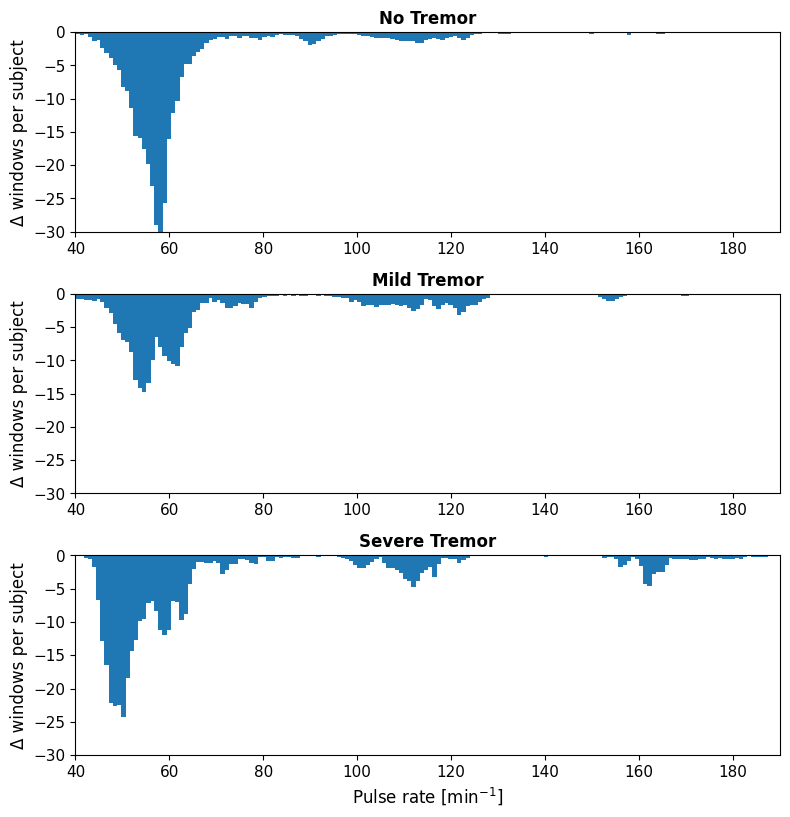

In [ ]:
# Calculate the differences between adjusted and unadjusted results
tremor_groups = ['NoTremor', 'MildTremor', 'SevereTremor']
diff_hist_counts = {}

# Compute differences for each tremor group
for group in tremor_groups:
    diff_hist_counts[group] = hist_counts_by_label[group] - hist_counts_by_label_unadj[group]

# Initialize list for axes handles
axes_handles_unadj = []
bin_resolution = 0.8824
bin_edges = np.arange(40, 200,bin_resolution)

TremorLabel = final_database['tremor_label'].values
# Visualize the differences using bar plots
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
for i, group in enumerate(tremor_groups):
    n_ind = np.sum(TremorLabel == i)  # Assuming `TremorLabel` is defined or loaded

    # Separate day and night for visualization
    day_diffs = diff_hist_counts[group][:, 0]
    
    # Create a subplot for each tremor group
    ax = axes[i]
    ax.bar(bin_edges[:-1], day_diffs/n_ind, width=1, align='edge', label='Day')

    adjusted_group_name = group.replace('Tremor', ' Tremor')
    ax.set_title(adjusted_group_name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Δ windows per subject', fontsize=12)
    # increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=11)
    # Set xlim and ylim
    ax.set_xlim([40, 190])
    ax.set_ylim([-30, 0])
    axes_handles_unadj.append(ax)  # Store handle for linking Y-axis

# Link axes for all subplots
fig.tight_layout()
# Add x label to the last subplot
axes[-1].set_xlabel('Pulse rate [min$^{-1}$]', fontsize=12)
output_path = fr"path_to_output\hist_diff_plots_hr_week{week}.png"  # Replace with your desired file name
fig.savefig(output_path, dpi=300, bbox_inches='tight')  # Save the figure

# Adjust figure layout and add a super title
plt.show()


#### Now for dyskinesia

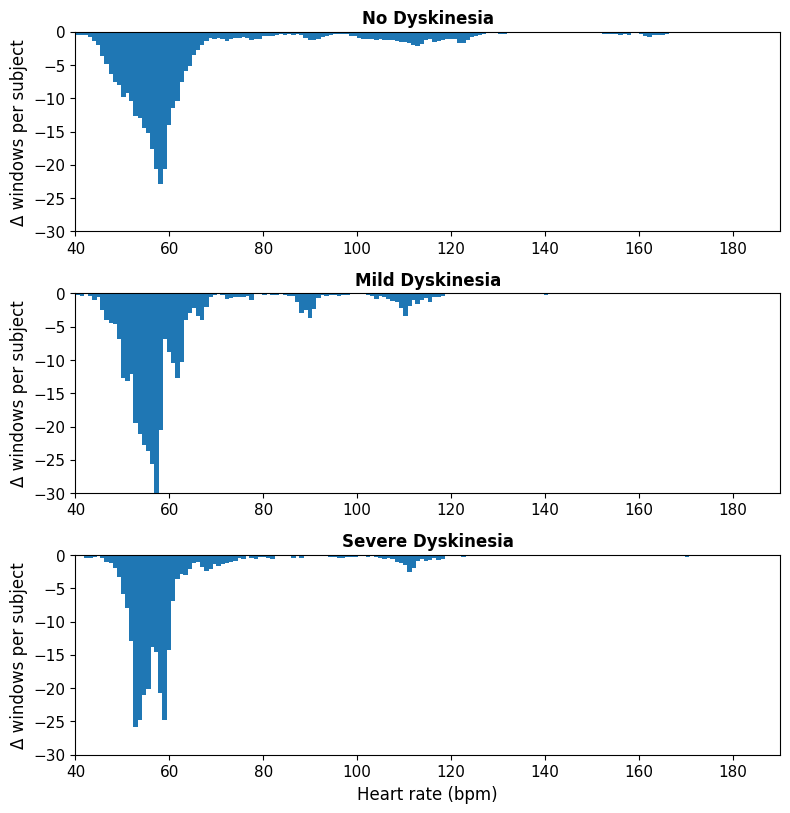

In [ ]:
# Calculate the differences between adjusted and unadjusted results
dys_groups = ['NoDyskinesia', 'MildDyskinesia', 'SevereDyskinesia']  # Adjust terms accordingly --> is this clinically the correct term?
diff_hist_counts = {}

# Compute differences for each dyskinesia group
for group in dys_groups:
    diff_hist_counts[group] = hist_counts_by_label[group] - hist_counts_by_label_unadj[group]

# Initialize list for axes handles
axes_handles_unadj = []
bin_resolution = 0.8824
bin_edges = np.arange(40, 200,bin_resolution)

DysLabel = final_database['dyskinesia_label'].values
# Visualize the differences using bar plots
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
for i, group in enumerate(dys_groups):
    n_ind = np.sum(DysLabel == i)  # Assuming `TremorLabel` is defined or loaded

    # Separate day and night for visualization
    day_diffs = diff_hist_counts[group][:, 0]
    
    # Create a subplot for each dyskinesia group
    ax = axes[i]
    ax.bar(bin_edges[:-1], day_diffs/n_ind, width=1, align='edge', label='Day')

    adjusted_group_name = group.replace('Dyskinesia', ' Dyskinesia')

    ax.set_title(adjusted_group_name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Δ windows per subject', fontsize=12)
    # increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=11)
    # Set xlim and ylim
    ax.set_xlim([40, 190])
    ax.set_ylim([-30, 0])
    axes_handles_unadj.append(ax)  # Store handle for linking Y-axis

# Link axes for all subplots
fig.tight_layout()
# Add x label to the last subplot
axes[-1].set_xlabel('Heart rate (bpm)', fontsize=12)
output_path = r"path_to_output\hist_diff_plots_hr_week0.png"  # Replace with your desired file name
fig.savefig(output_path, dpi=300, bbox_inches='tight')  # Save the figure

# Adjust figure layout and add a super title
plt.show()